In [1]:
# Auto-reload modules on change
%load_ext autoreload
%autoreload 2

In [2]:
import os
import random
import supervision as sv
from PIL import Image
from rfdetr import RFDETRMedium
from pathlib import Path
from utils.io import read_json

In [3]:
# DATA
RANDOM_SEED = 42
PREP_DATA_DIR = Path("../data/VNL_500Videos_RTDETR")

# MODEL
CHECKPOINT = "../finetune/checkpoint_best_regular.pth"

In [4]:
annotations = read_json("../data/VNL_500Videos_RTDETR/test/_annotations.coco.json")
object_classes = {val["id"]: val["name"] for val in annotations["categories"]}

In [5]:
model = RFDETRMedium(pretrain_weights=CHECKPOINT)

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


/home/hoang/code/Jump-Player-Joint-Detection/data/VNL_500Videos_RTDETR/test/pol_usa_men_vnl_2023_1080p_rally_000142_000220.jpg


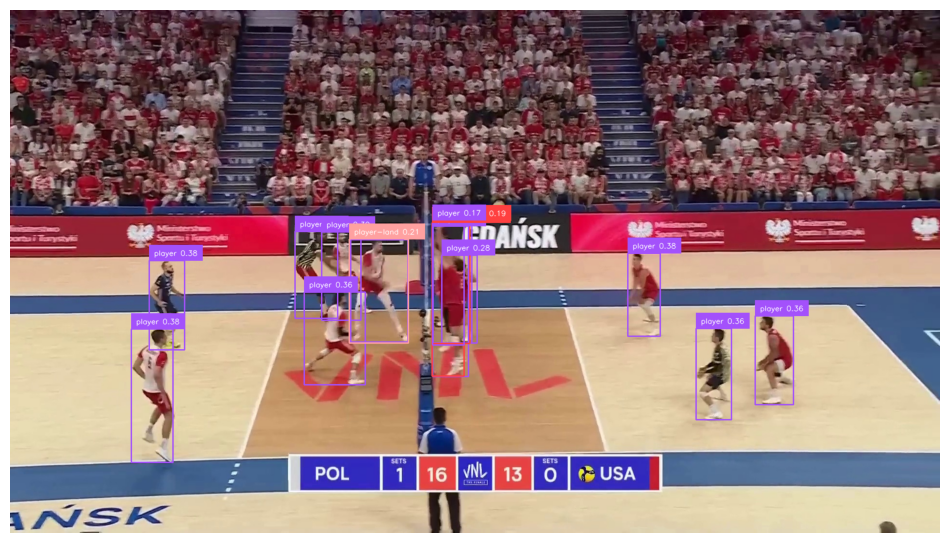

In [14]:
image_path = os.path.abspath(PREP_DATA_DIR / "test" / random.choice(annotations["images"])["file_name"])
image = Image.open(image_path)
detections = model.predict(image, threshold=0.15)

labels = [
    f"{object_classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

print(image_path)
sv.plot_image(annotated_image)

In [15]:
labels

['player 0.38',
 'player 0.38',
 'player 0.38',
 'player 0.36',
 'player 0.36',
 'player 0.36',
 'player 0.34',
 'player 0.32',
 'player 0.32',
 'player 0.30',
 'player 0.30',
 'player 0.28',
 'player-jump 0.23',
 'player-land 0.21',
 'player-jump 0.19',
 'player 0.17']

/home/hoang/code/Jump-Player-Joint-Detection/data/VNL_500Videos_RTDETR/test/usa_ita_men_vnl_2023_1080p_rally_000064_000268.jpg


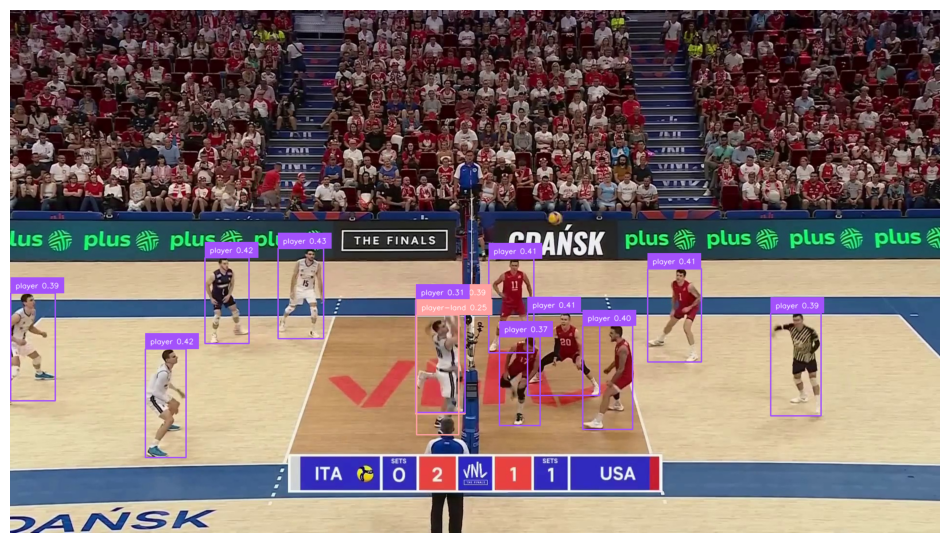

In [51]:
# Show some frames that have Jump &/ Land

while True:
    image_path = os.path.abspath(PREP_DATA_DIR / "test" / random.choice(annotations["images"])["file_name"])
    image = Image.open(image_path)
    detections = model.predict(image, threshold=0.25)
    
    if any(_cls != 0 for _cls in detections.class_id):
        break


labels = [
    f"{object_classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

print(image_path)
sv.plot_image(annotated_image)